In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [10]:
raw_data = pd.read_csv("D:\python\knn\covtype.csv\covtype.csv", sep = ',')

In [11]:
raw_data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [12]:
#стандартизация датасета
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(raw_data.drop('Cover_Type', axis=1))
#стандартизация всех признаков
scaled_features = scaler.transform(raw_data.drop('Cover_Type', axis=1))
scaled_data = pd.DataFrame(scaled_features, columns = raw_data.drop('Cover_Type', axis=1).columns)

In [13]:
#Разделение датасета на обучающие и тестовые данные
from sklearn.model_selection import train_test_split
x = scaled_data
y = raw_data['Cover_Type']

x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x, y, test_size = 0.3)

In [14]:
#Обучение модели K-ближайших соседей
from sklearn.neighbors import KNeighborsClassifier
#выберем значение K=1 для алгоритма K-ближайших соседей.
model = KNeighborsClassifier(n_neighbors = 1)
#обучим модель, используя метод fit
model.fit(x_training_data, y_training_data)

KNeighborsClassifier(n_neighbors=1)

In [15]:
#Делаем предсказания с помощью алгоритма K-ближайших соседей
predictions = model.predict(x_test_data)

In [16]:
#Оценка точности нашей модели
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test_data, predictions))

              precision    recall  f1-score   support

           1       0.94      0.93      0.93     63580
           2       0.94      0.95      0.94     84909
           3       0.92      0.91      0.92     10709
           4       0.82      0.81      0.81       814
           5       0.81      0.80      0.80      2808
           6       0.83      0.85      0.84      5271
           7       0.94      0.95      0.94      6213

    accuracy                           0.93    174304
   macro avg       0.88      0.88      0.88    174304
weighted avg       0.93      0.93      0.93    174304



In [17]:
# сгенерируем матрицу ошибок
print(confusion_matrix(y_test_data, predictions))


[[59301  3847     7     0    68    19   338]
 [ 3668 80274   231     1   413   279    43]
 [   11   262  9771   104    33   528     0]
 [    0     0    94   656     0    64     0]
 [   61   465    28     0  2234    18     2]
 [    8   216   514    42    10  4481     0]
 [  266    55     0     0     1     0  5891]]


# Модели кластеризации методом K-средних

In [19]:
from sklearn.datasets import make_blobs
#воспользуемся функцией make_blobs, чтобы получить фиктивные данные
raw_data = make_blobs(
    n_samples = 200, 
    n_features = 2, 
    centers = 4, 
    cluster_std = 1.8
)

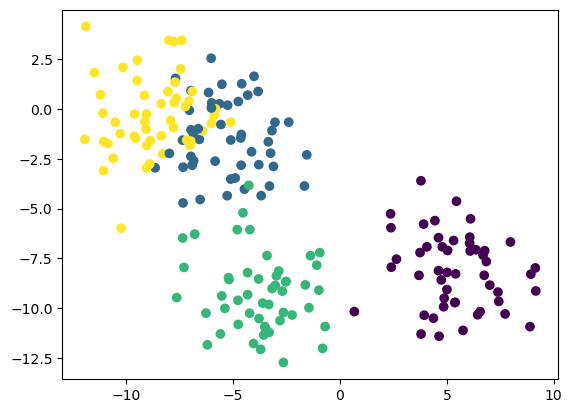

In [20]:
#Визуализация датасета
plt.scatter(raw_data[0][:,0], raw_data[0][:,1], c=raw_data[1]);

# Создание и обучение модели кластеризации K-средних

In [21]:
from sklearn.cluster import KMeans
#выберем значение к=4
model = KMeans(n_clusters=4)

model.fit(raw_data[0])

C:\Users\ivan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [22]:
# предскажем, к какому кластеру принадлежит каждая точка данных.
model.labels_

array([1, 3, 2, 3, 0, 3, 3, 2, 0, 3, 0, 2, 0, 0, 2, 3, 1, 2, 0, 3, 3, 3,
       1, 0, 1, 2, 2, 2, 2, 3, 2, 1, 3, 2, 3, 2, 1, 1, 2, 1, 2, 0, 3, 0,
       2, 1, 2, 0, 1, 0, 3, 2, 1, 1, 3, 2, 1, 1, 0, 1, 3, 2, 0, 0, 2, 0,
       1, 2, 0, 2, 3, 3, 2, 1, 1, 3, 1, 2, 1, 0, 3, 2, 1, 2, 2, 3, 2, 2,
       2, 3, 2, 0, 3, 2, 0, 2, 1, 0, 2, 3, 3, 3, 0, 1, 0, 0, 2, 1, 0, 0,
       1, 0, 3, 3, 0, 0, 2, 1, 3, 3, 1, 0, 1, 1, 3, 1, 2, 2, 0, 1, 1, 3,
       0, 1, 0, 1, 0, 1, 3, 3, 1, 2, 0, 3, 3, 0, 0, 0, 3, 0, 2, 0, 3, 1,
       0, 2, 1, 1, 0, 0, 3, 2, 2, 0, 1, 2, 3, 3, 1, 3, 0, 3, 1, 1, 3, 0,
       0, 3, 2, 0, 2, 0, 1, 3, 0, 0, 1, 1, 1, 3, 3, 0, 3, 2, 2, 0, 1, 0,
       2, 1])

In [23]:
#узнаем, где находится центр каждого кластера
model.cluster_centers_

array([[-5.11730943, -1.66460603],
       [ 5.52373084, -8.09920534],
       [-8.94051545, -0.18506751],
       [-3.63577395, -9.45402436]])

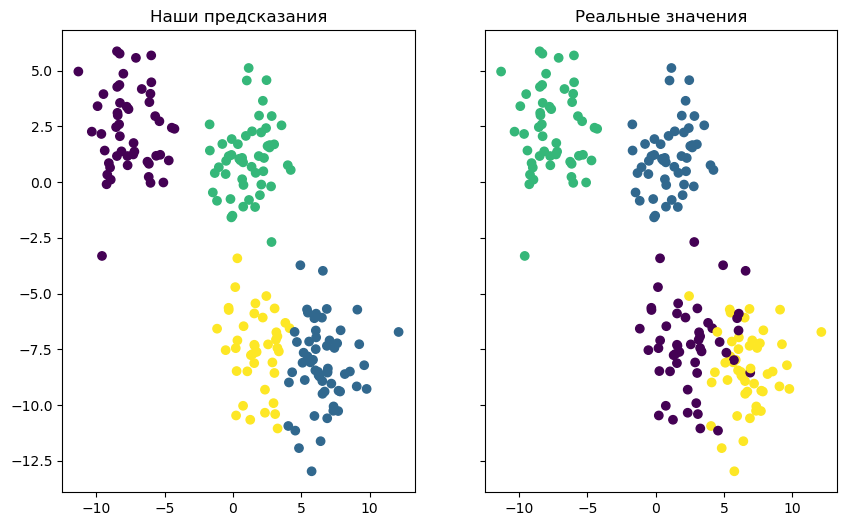

In [18]:
#Визуализация точности предсказаний модели
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('Наши предсказания')
ax1.scatter(raw_data[0][:,0], raw_data[0][:,1],c=model.labels_)
ax2.set_title('Реальные значения')
ax2.scatter(raw_data[0][:,0], raw_data[0][:,1],c=raw_data[1]);